In [18]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [35]:
import numpy as np
import pandas as pd 
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [20]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [21]:
train_df.drop(columns=['Fence','MiscFeature','FireplaceQu','Alley','PoolQC','SalePrice'])
train_df = train_df.fillna(train_df.mean())

In [74]:
y = train_df['SalePrice'].to_numpy()
x = train_df.iloc[:,1:80]
x = pd.get_dummies(x).to_numpy()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=45)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
prediction = reg.predict(x_test)
prediction_error = (y_test - prediction)**2
prediction_error.sum()/y_test.shape[0]

534332841.8552759

The ordinary least square worked ok here with MSE:534332841 and R square 0.93. 

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
b = []
for k in range(1,30):
    a = []
    kf = KFold(n_splits=10)
    for train, test in kf.split(x, y):
        neigh = KNeighborsRegressor(n_neighbors=k)
        neigh.fit(x[train], y[train]) 
        prediction = neigh.predict(x[test])
        prediction_error = (y[test] - prediction)**2
        a.append(prediction_error.sum()/y[test].shape[0])
    b.append(a)

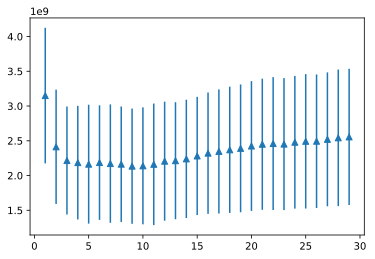

In [56]:
s = []
for each in b:
    s.append(np.mean(each))
std = []
for each in b:
    std.append(np.std(each))
plt.errorbar(range(1,30), s, std, linestyle='None', marker='^')
plt.show()

The KNN here with k = 2 is bad with MSE=2215597661. Again the knn do not work well in high dimensional data sets.

In [60]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)

In [61]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv = 10)
ridge.fit(x, y)
ridge.score(x, y)

0.9010420171856474

In [62]:
ridge.alpha_

10.0

In [67]:
from sklearn.linear_model import Ridge
b = []
kf = KFold(n_splits=10)
alpha = 1
a_list = []
for train, test in kf.split(x, y):
    ridge = Ridge(alpha=10)
    ridge.fit(x[train], y[train]) 
    prediction = ridge.predict(x[test])
    prediction_error = (y[test] - prediction)**2
    a_list.append(prediction_error.sum()/y[test].shape[0])
np.mean(a_list)

1026228270.8595736

The ridge regression also ok. Again I would also attribute that to the dimension of the data. 
MSE=1026228270 

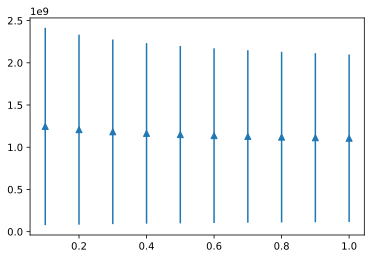

In [47]:
s = []
for each in b:
    s.append(np.mean(each))
std = []
for each in b:
    std.append(np.std(each))
plt.errorbar(alpha, s, std, linestyle='None', marker='^')
plt.show()

In [68]:
from sklearn import linear_model
b =[]
kf = KFold(n_splits=10)
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for a in alpha:
    a_list = []
    for train, test in kf.split(x, y):
        lasso = linear_model.Lasso(alpha=a)
        lasso.fit(x[train], y[train]) 
        prediction = lasso.predict(x[test])
        prediction_error = (y[test] - prediction)**2
        a_list.append(prediction_error.sum()/y[test].shape[0])
    b.append(a_list)

In [72]:
lasso = linear_model.LassoCV(cv = 10)
lasso.fit(x, y)
lasso.alpha_

209067.77468299225

In [73]:
for train, test in kf.split(x, y):
    lasso = linear_model.Lasso(alpha=209067)
    lasso.fit(x[train], y[train]) 
    prediction = lasso.predict(x[test])
    prediction_error = (y[test] - prediction)**2
    a_list.append(prediction_error.sum()/y[test].shape[0])
np.mean(a_list)

1573235350.5421784

The Lasso regression worked also ok with MSE=1573235350. 

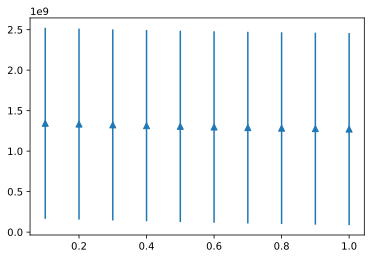

In [49]:
s = []
for each in b:
    s.append(np.mean(each))
std = []
for each in b:
    std.append(np.std(each))
plt.errorbar(alpha, s, std, linestyle='None', marker='^')
plt.show()

In [93]:
import statsmodels.api as sm
y = train_df['SalePrice']
x = train_df.iloc[:,1:80]
x = pd.get_dummies(x)

In [152]:
kf = KFold(n_splits=10)
alpha = [1]
c = []
b=[]
a_list = []
for a in range(1,10):
    for train, test in kf.split(x, y):
        included = set(x.columns)
        x_1 = x.iloc[train]
        y_1 = y.iloc[train]
        while len(included) > a:
            X2 = sm.add_constant(x_1[included])
            BSR = sm.OLS(y_1, X2)
            BSR2 = BSR.fit()
            k = BSR2.pvalues
            try:
                k1 = k.drop('const')
            except:
                print('hi')
            included.remove(argmax(k1))
        X2 = sm.add_constant(x_1[included])
        est = sm.OLS(y_1, X2)
        est2 = est.fit()
        x_3 = x.iloc[test]
        X_3 = sm.add_constant(x_3[included])
        prediction = est2.predict(X_3)
        prediction_error = (y.iloc[test] - prediction)**2
        a_list.append(prediction_error.sum()/prediction.shape[0])
    b.append(a_list)

hi
hi


KeyError: '1stFlrSF'

[[122012624428.68674,
  127483380160.89127,
  88107316131.34444,
  307263840524.7465,
  196859103002.95978,
  303660428760.1635,
  119428102062.95856,
  119888867568.92084,
  607181839655.0483,
  105587538242.26387]]

Surpirsingly the backward stepwise here did 